In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
data = sns.load_dataset("titanic")
# data.head()
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
features=["pclass","sex","fare","embarked","age"];
target = ["survived"]
from sklearn.impute import SimpleImputer
imp_med = SimpleImputer(strategy="median")
data[["age"]] = imp_med.fit_transform(data[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
data[["embarked"]] = imp_freq.fit_transform(data[["embarked"]])


In [7]:
from sklearn.preprocessing import LabelEncoder;

le = LabelEncoder()
data["sex"]= le.fit_transform(data["sex"]);
data["embarked"]= le.fit_transform(data["embarked"]);

In [15]:
X= data[features];
Y = data["survived"];
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("accuracy:",accuracy_score(y_test,y_pred));
print("Testing accuracy",accuracy_score(y_train,y_pred_train))

accuracy: 0.8101694915254237
Testing accuracy 0.8422818791946308


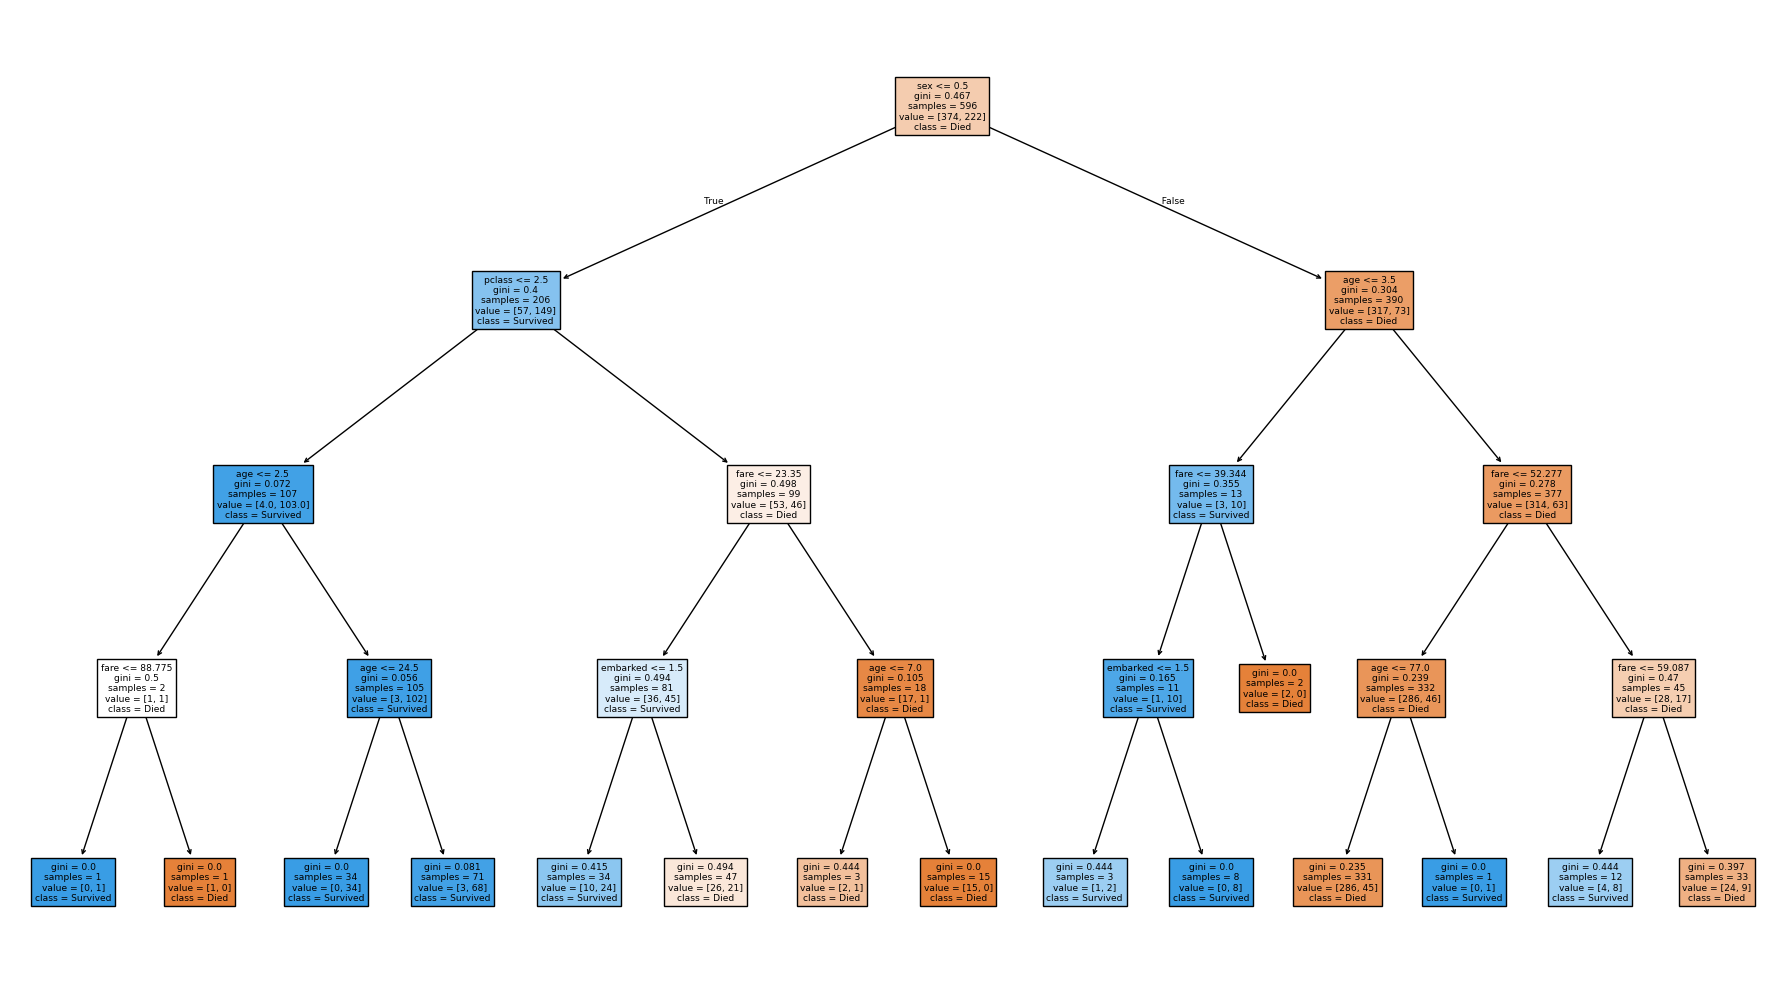

In [26]:
#Plot Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died","Survived"],
    filled=True,
    max_depth=4
  
)
plt.tight_layout();
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=201,
    oob_score = True,
    max_depth=4
)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print("oob score ",rf.oob_score_ * 100 ,"%")
print("Testing  accuracy ",accuracy_score(y_test,y_pred) * 100  ,"%")


oob score  81.20805369127517 %
Testing  accuracy  82.37288135593221 %


In [32]:
from sklearn.ensemble import BaggingClassifier
base_model = DecisionTreeClassifier(max_depth=4)
bagging = BaggingClassifier(
    base_model,
    n_estimators = 201
)


bagging.fit(X_train,y_train)
y_pred_bagging = bagging.predict(X_test)
print("Accuracy score :",accuracy_score(y_test,y_pred_bagging))

Accuracy score : 0.8033898305084746
